In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from ipywidgets import interact, IntSlider, fixed, FloatSlider

In [2]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Берем метод DBSCAN
from sklearn.cluster import DBSCAN
# Подключаем набор данных.
from sklearn.datasets import load_iris

In [4]:
# Загружаем набор данных.
iris = sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
def dbscan_demo(eps=1, min_pts=5):
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    # https://www.youtube.com/watch?v=5E097ZLE9Sg
    dbscan = DBSCAN(
        eps=eps, # maximum distance
        min_samples=min_pts # The number of samples (or total weight) in a neighborhood
    ).fit(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    
    iris['labels'] = dbscan.labels_+1
    
    plt.figure(figsize=(7,5))
    plt.scatter(iris.iloc[:,0], iris.iloc[:,3], c=dbscan.labels_+1)
    
    plt.show()

In [8]:
interact(dbscan_demo, eps=FloatSlider(min=0.1, max=3, step=0.05, value=1), min_pts=IntSlider(min=2, max=15, step=1, value=5));

interactive(children=(FloatSlider(value=1.0, description='eps', max=3.0, min=0.1, step=0.05), IntSlider(value=…

# TASK

In [10]:
from scipy import ndimage, misc
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [143]:
# First picture:
image = Image.open('data/lab_1_2_pic_1.png')
pix3 = image.load()

In [144]:
%%time
# Создаем объект для кластеризации.
#db=DBSCAN(eps=4, min_samples=3, n_jobs=4)
db=KMeans(n_clusters=30, n_jobs=4)

data = [(x, y, pix3[x, y][0], pix3[x, y][1], pix3[x, y][2]) for x in range(image.size[0]) for y in range(image.size[1])]

db_clusters=db.fit_predict(data)

Wall time: 490 ms


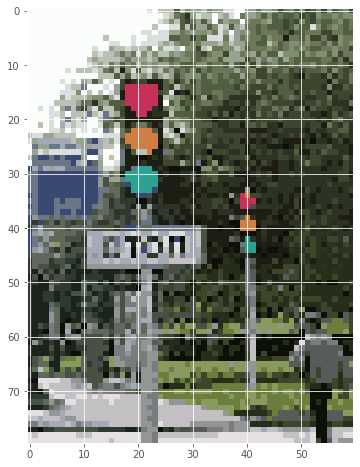

In [145]:
for p, c in zip(data, db_clusters):
    pix3[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                        int(db.cluster_centers_[c, 3]), 
                        int(db.cluster_centers_[c, 4]))
    
plt.rcParams['figure.figsize'] = (12, 8)    
ax = plt.subplot()
ax.imshow(image);

In [146]:
# Выбираем точку кластера:
color = pix3[21, 17]
color

(199, 48, 88)

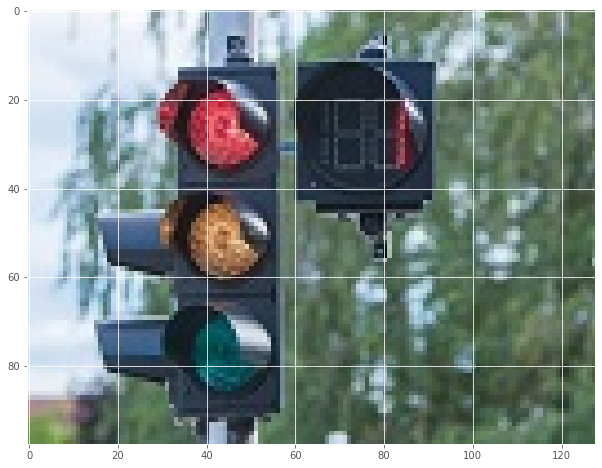

In [147]:
pix4 = np.array(Image.open('data/lab_1_2_pic_2.png'))
ax = plt.subplot()
ax.imshow(pix4);

In [148]:
%%time
data2 = [(x, y, pix4[x, y][0], pix4[x, y][1], pix4[x, y][2]) for x in range(pix4.shape[0]) for y in range(pix4.shape[1])]

db_clusters=db.fit_predict(data2)

Wall time: 1.38 s


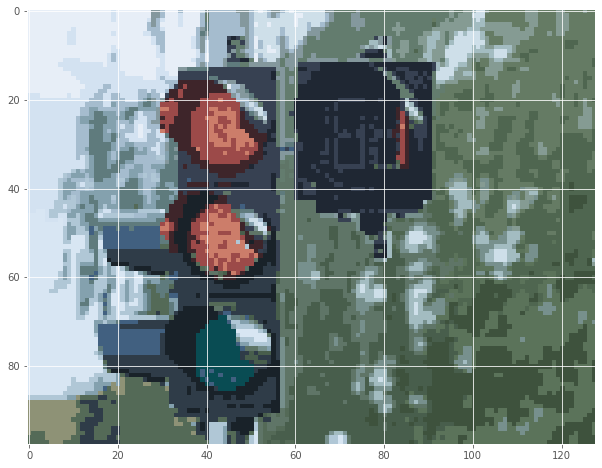

In [153]:
for p, c in zip(data2, db_clusters):
    pix4[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                        int(db.cluster_centers_[c, 3]), 
                        int(db.cluster_centers_[c, 4]))
    
plt.rcParams['figure.figsize'] = (12, 8)    
ax = plt.subplot()
ax.imshow(pix4);

In [164]:
near = []
for i, c in enumerate(db.cluster_centers_):
    if abs(c[2]-color[0]) + abs(c[3]-color[1]) + abs(c[4]-color[2]) < 84:
        print(i, c)
        near.append(i)

7 [ 35.58577406  43.30125523 156.09205021  74.35146444  73.71548117]


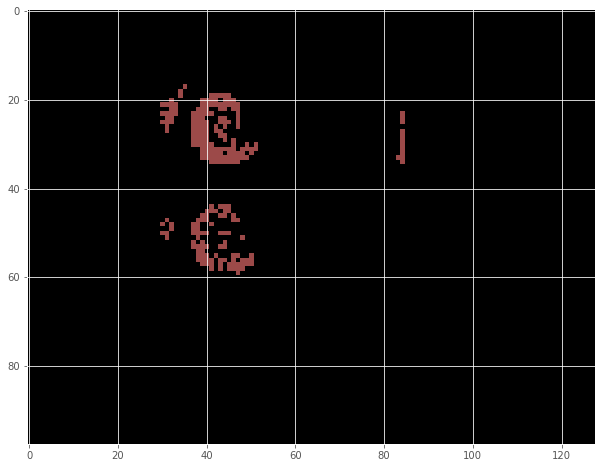

In [165]:
pix4_1 = np.zeros(pix4.shape, np.uint8)

for p, c in zip(data2, db_clusters):
    if c in near:
        pix4_1[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                              int(db.cluster_centers_[c, 3]), 
                              int(db.cluster_centers_[c, 4]))

ax = plt.subplot()
ax.imshow(pix4_1);

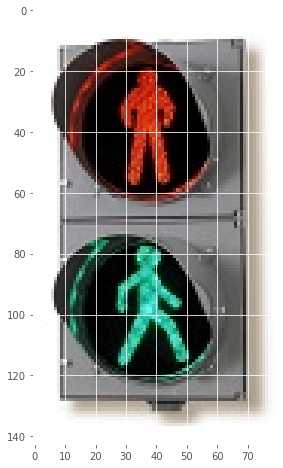

In [119]:
pix5 = np.array(Image.open('data/lab_1_2_pic_4.png'))
ax = plt.subplot()
ax.imshow(pix5);

32 [ 37.2027027   37.05405405 202.57432432  50.81756757  24.97297297]
80 [ 42.21311475  38.06557377 213.95081967  79.24590164  54.18032787]


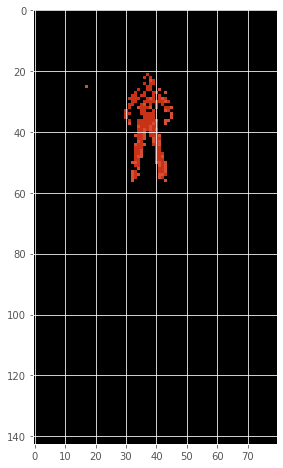

In [122]:
data3 = [(x, y, pix5[x, y][0], pix5[x, y][1], pix5[x, y][2]) for x in range(pix5.shape[0]) for y in range(pix5.shape[1])]

db_clusters=db.fit_predict(data3)

near = []
for i, c in enumerate(db.cluster_centers_):
    if abs(c[2]-color[0]) + abs(c[3]-color[1]) + abs(c[4]-color[2]) < 140:
        print(i, c)
        near.append(i)
        
pix5_1 = np.zeros(pix5.shape, np.uint8)

for p, c in zip(data3, db_clusters):
    if c in near:
        pix5_1[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                              int(db.cluster_centers_[c, 3]), 
                              int(db.cluster_centers_[c, 4]))

ax = plt.subplot()
ax.imshow(pix5_1);